In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - Load relevant data

In [19]:
# Import songs dataset and remove useless cols
# Split on index == 299 i.e 'Hey Mama' -> split fideles
songs = pd.read_csv('songs.csv') \
    .drop(columns=['index', 'acous', 'spch', 'pop']) \
    .iloc[299:, :] \
    .reset_index(drop=True) \
    .rename({'top genre': 'genre'}, axis=1)

# Import lyrics dataset
# (removed {}, removed all (, replaced all ): for a comma, changed file type to .csv)
lyrics = pd.read_csv(
        "fideles.csv",
        sep=",",
        quotechar='"',
        skipinitialspace=True
    ) \
    .drop(columns=['lyrics']) \
    .reset_index() \
    .rename(
        {
            'index':'title1',
            'title':'artist1',
            'artist':'lyrics'
        }, axis=1
    )

lyrics = lyrics.rename({'title1': 'title', 'artist1':'artist'}, axis=1)

# Add lyrics column
songs['lyrics'] = lyrics['lyrics']

display(songs)
display(lyrics)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,lyrics
0,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,dance pop,2015,86,73,60,-4,33,53,193,"[Intro: Alan Lomax, Bebe Rexha] Be my woman, g..."
1,Genie In a Bottle,Christina Aguilera,dance pop,2015,176,80,63,-7,14,91,218,"[Intro] (Come on, come on, uh, yeah) Oh-ooh, w..."
2,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,"[Chorus] Can we, we keep Keep each other compa..."
3,Sing,Ed Sheeran,pop,2015,120,67,82,-4,6,94,235,[Verse 1] It's late in the evening Glass on th...
4,Jealous - Remix,Nick Jonas,dance pop,2015,93,71,68,-4,44,45,222,"[Intro: Tinashe] Uhh, mmm Nick J Tinashe It's ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
299,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,I'll try to pass the night away with somebody ...
300,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,"Anything she need, she can call me Don't worry..."
301,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,We the Best Music! Another one! DJ Khaled! You...
302,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


,title,artist,lyrics
0,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,"[Intro: Alan Lomax, Bebe Rexha] Be my woman, g..."
1,Genie In a Bottle,Christina Aguilera,"[Intro] (Come on, come on, uh, yeah) Oh-ooh, w..."
2,Company,Justin Bieber,"[Chorus] Can we, we keep Keep each other compa..."
3,Sing,Ed Sheeran,[Verse 1] It's late in the evening Glass on th...
4,Jealous - Remix,Nick Jonas,"[Intro: Tinashe] Uhh, mmm Nick J Tinashe It's ..."
...,...,...,...
299,Find U Again (feat. Camila Cabello),Mark Ronson,I'll try to pass the night away with somebody ...
300,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,"Anything she need, she can call me Don't worry..."
301,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,We the Best Music! Another one! DJ Khaled! You...
302,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,"Mm-mm Ah, ah Mm-mm-mm-mm-mm-mm-mm Christmas is..."


## 2 - Songs dataset EDA

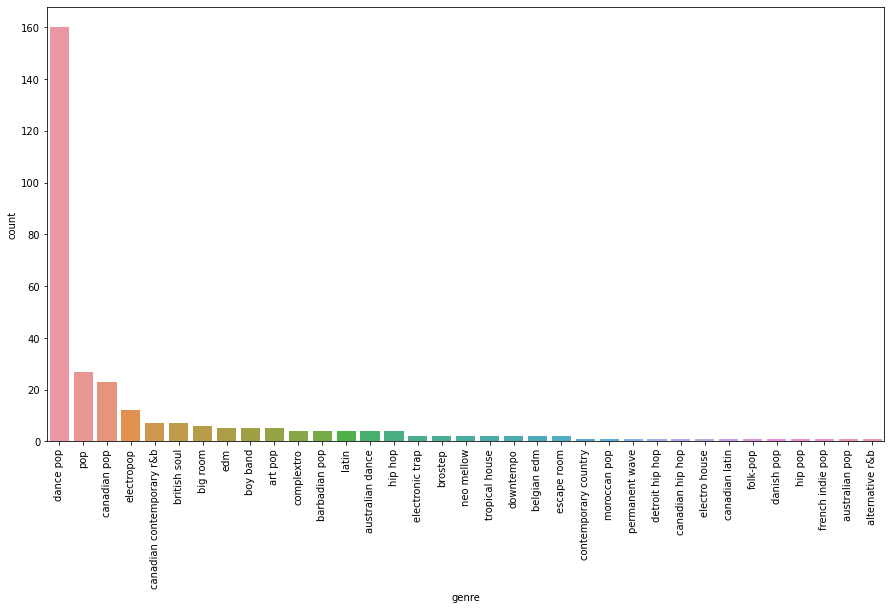

In [3]:
# Group songs by genre and absolute frequency
genres = pd.DataFrame(songs['genre'].value_counts()).reset_index().rename({'genre': 'count', 'index':'genre'}, axis=1)
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x=genres['genre'], y=genres['count'])
labels = plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, '100'),
  Text(1, 0, '120'),
  Text(2, 0, '122'),
  Text(3, 0, '102'),
  Text(4, 0, '105'),
  Text(5, 0, '124'),
  Text(6, 0, '125'),
  Text(7, 0, '123'),
  Text(8, 0, '95'),
  Text(9, 0, '93'),
  Text(10, 0, '110'),
  Text(11, 0, '104'),
  Text(12, 0, '90'),
  Text(13, 0, '108'),
  Text(14, 0, '126'),
  Text(15, 0, '113'),
  Text(16, 0, '130'),
  Text(17, 0, '98'),
  Text(18, 0, '94'),
  Text(19, 0, '112'),
  Text(20, 0, '118'),
  Text(21, 0, '114'),
  Text(22, 0, '106'),
  Text(23, 0, '92'),
  Text(24, 0, '134'),
  Text(25, 0, '103'),
  Text(26, 0, '96'),
  Text(27, 0, '86'),
  Te

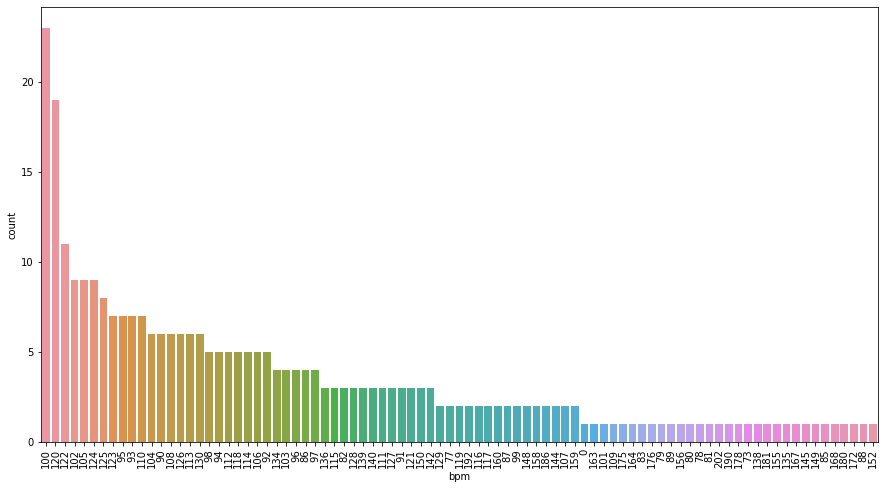

In [4]:
# Group songs by bpms and absolute frequency
bpms = pd.DataFrame(songs['bpm'].value_counts(sort=True)).reset_index().rename({'index':'bpm1', 'bpm':'count'}, axis=1)
bpms = bpms.rename({'bpm1': 'bpm'}, axis=1).sort_values(by='count', ascending=False)
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x=bpms['bpm'], y=bpms['count'], order=bpms['bpm'])
plt.xticks(rotation=90)

In [5]:
# There's one song with useless values, so we will remove it
songs.loc[songs['bpm'] == 0]


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,lyrics
143,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,"I only wanted to have fun Learning to fly, lea..."


In [6]:
def plotByYear(df, years, x, y):
    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(hspace=1.5, wspace=0.2)
    for year in years:
        to_plot = df.loc[year].reset_index()
        sns.barplot(x=to_plot[x], y=to_plot[y], ax=fig.add_subplot(2, 3, years.index(year) + 1))
        plt.xticks(rotation=90)
        plt.title(str(year))
    plt.show()


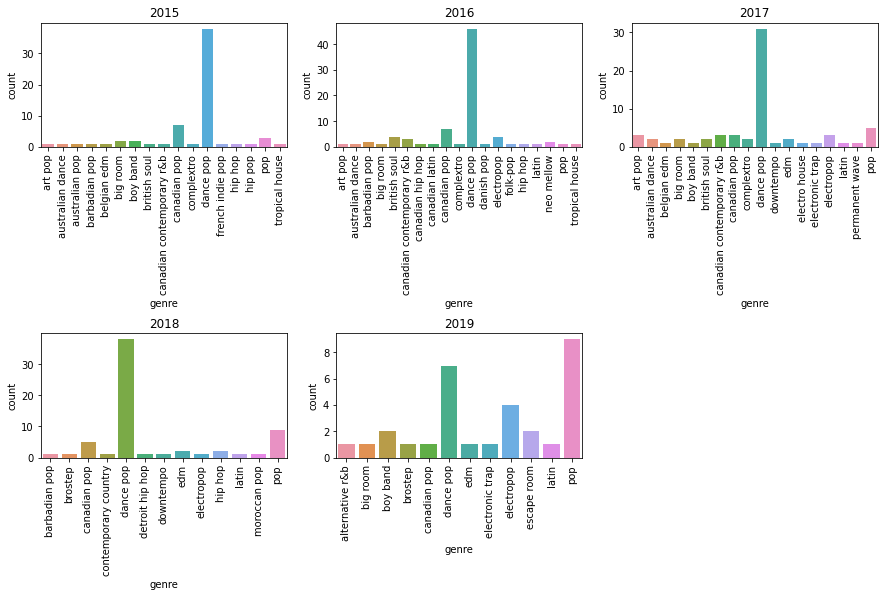

In [7]:
# Yearly analysis
groups = songs.groupby(['year', 'genre'])
yearly_genre_count = groups.count()[['title']].rename({'title': 'count'}, axis=1)

plotByYear(yearly_genre_count, [2015, 2016, 2017, 2018, 2019], 'genre', 'count')

## 2 - Cleaning lyrics dataset

In [8]:
# 1 - Remove content between []
from re import sub
lyrics['lyrics'] = lyrics.apply(
    lambda row: sub(r'\[.*?\]', '', row['lyrics']),
    axis=1
)

In [9]:
# 2 - Remove all punctuation from lyrics except single quotes ('')
# and lowercase all words
import string

lyrics['lyrics'] = lyrics.apply(
    lambda row: row['lyrics'].translate(
        str.maketrans('', '', string.punctuation.replace("'", ""))
        ).lower(),
    axis=1
)

In [10]:
# 3 - Tokenize
from nltk.tokenize import wordpunct_tokenize

lyrics['tokenized_lyrics'] = lyrics.apply(
    lambda row: wordpunct_tokenize(row['lyrics']), axis=1
)

In [11]:
# 4 - Apply POS-tagging
from nltk.tag import pos_tag

lyrics['tagged_lyrics'] = lyrics.apply(
    lambda row: pos_tag(row['tokenized_lyrics'], tagset='universal'), axis=1
)

In [12]:
# 5 - Lemmatize -> transform plurals to singular
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

lyrics['lemmatized_lyrics'] = lyrics.apply(
    lambda row: [
        lem.lemmatize(word)
        for word in row['tokenized_lyrics']
    ],
    axis=1
)


In [15]:
lyrics.to_csv("fideles_lyrics.csv")
display(lyrics)

,title,artist,lyrics,tokenized_lyrics,tagged_lyrics,lemmatized_lyrics
0,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro...",David Guetta,be my woman girl i'll be your man be my woman...,"[be, my, woman, girl, i, ', ll, be, your, man,...","[(be, VERB), (my, PRON), (woman, NOUN), (girl,...","[be, my, woman, girl, i, ', ll, be, your, man,..."
1,Genie In a Bottle,Christina Aguilera,come on come on uh yeah ohooh whoaoh come on ...,"[come, on, come, on, uh, yeah, ohooh, whoaoh, ...","[(come, VERB), (on, ADP), (come, NOUN), (on, A...","[come, on, come, on, uh, yeah, ohooh, whoaoh, ..."
2,Company,Justin Bieber,can we we keep keep each other company maybe ...,"[can, we, we, keep, keep, each, other, company...","[(can, VERB), (we, PRON), (we, PRON), (keep, V...","[can, we, we, keep, keep, each, other, company..."
3,Sing,Ed Sheeran,it's late in the evening glass on the side i'...,"[it, ', s, late, in, the, evening, glass, on, ...","[(it, PRON), (', .), (s, ADJ), (late, ADV), (i...","[it, ', s, late, in, the, evening, glass, on, ..."
4,Jealous - Remix,Nick Jonas,uhh mmm nick j tinashe it's the remix i don'...,"[uhh, mmm, nick, j, tinashe, it, ', s, the, re...","[(uhh, ADJ), (mmm, NOUN), (nick, ADJ), (j, NOU...","[uhh, mmm, nick, j, tinashe, it, ', s, the, re..."
...,...,...,...,...,...,...
299,Find U Again (feat. Camila Cabello),Mark Ronson,i'll try to pass the night away with somebody ...,"[i, ', ll, try, to, pass, the, night, away, wi...","[(i, NOUN), (', .), (ll, ADJ), (try, NOUN), (t...","[i, ', ll, try, to, pas, the, night, away, wit..."
300,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,anything she need she can call me don't worry ...,"[anything, she, need, she, can, call, me, don,...","[(anything, NOUN), (she, PRON), (need, ADP), (...","[anything, she, need, she, can, call, me, don,..."
301,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,we the best music another one dj khaled you st...,"[we, the, best, music, another, one, dj, khale...","[(we, PRON), (the, DET), (best, ADJ), (music, ...","[we, the, best, music, another, one, dj, khale..."
302,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,mmmm ah ah mmmmmmmmmmmmmm christmas is a time ...,"[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ...","[(mmmm, NOUN), (ah, NOUN), (ah, NOUN), (mmmmmm...","[mmmm, ah, ah, mmmmmmmmmmmmmm, christmas, is, ..."


## 2.1 Analyze tag distribution

In [14]:
from nltk import FreqDist

# 1 - Get tag frequency distribution for each song
tag_fd = pd.DataFrame(lyrics.apply(
    lambda row: dict(FreqDist(tag for (_, tag) in row['tagged_lyrics'])), axis=1
)).rename({0: 'fd'}, axis=1)

tagset, counts = [
    'ADJ', 'ADP', 'ADV',
    'CONJ', 'DET', 'NOUN',
    'NUM', 'PRT', 'PRON',
    'VERB', '.', 'X'
], []

# Get total tag distribution for all songs
for tag in tagset:
    tagcount = 0
    for i in range(len(tag_fd)):
        tagcount += tag_fd.iloc[i]['fd'].get(tag, 0)
    counts += [tagcount]


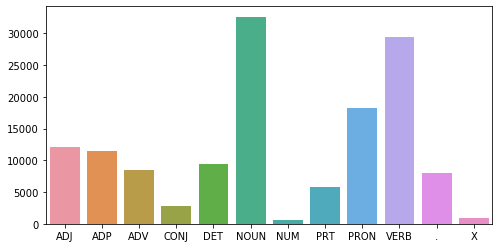

In [76]:
# Plot tag frequency distribution
fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x=tagset, y=counts)

# @TODO - perguntar ao Jb se ficamos só com a classe NOUN. Frequencia > 30k para 300 músicas
# Sentiment analysis nas palavras